# Намалување на димензијата на податочното множество

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
from scipy import spatial

# Извршете ја следната команда во anaconda: jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.1

## Корелација помеѓу карактеристики

In [41]:
x1 = np.random.normal(60, 30, 1000) # плоштина на куќа во m^2
x2 = 10.76*x1 + np.random.normal(0, 50, 1000) # плоштина на куќа во ft^2 + шум 

Text(0, 0.5, 'Плоштина на куќа во ft^2 + шум')

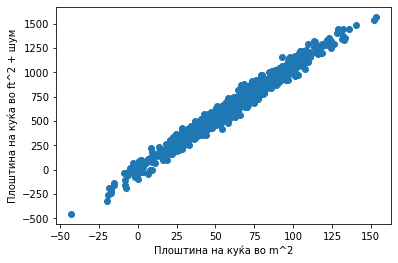

In [42]:
plt.scatter(x1, x2)
plt.xlabel('Плоштина на куќа во m^2')
plt.ylabel('Плоштина на куќа во ft^2 + шум')

In [43]:
y = 1000*x1 # цена на куќа во евра

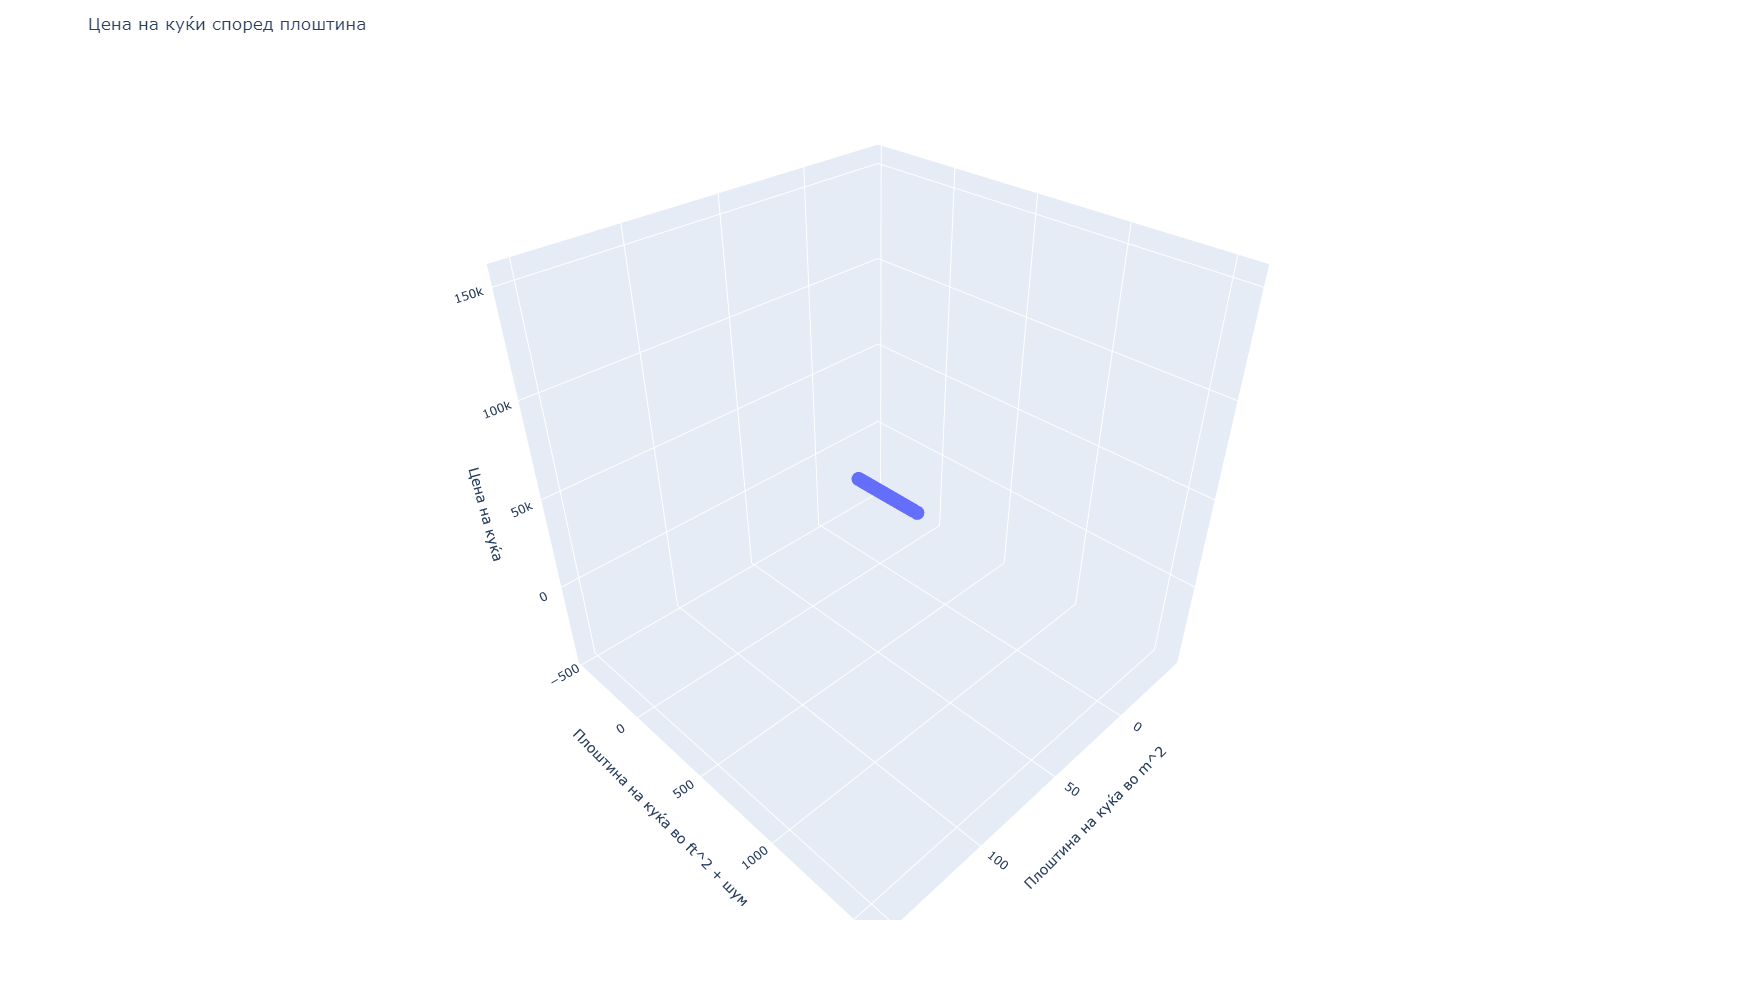

In [44]:
fig = px.scatter_3d(x=x1, y=x2, z=y, labels={'x': 'Плоштина на куќа во m^2', 'y': 'Плоштина на куќа во ft^2 + шум', 'z': 'Цена на куќа'})
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    title_text='Цена на куќи според плоштина'
)
fig.show()

Покрај дополнителната димензија, поради корелација помеѓу x1 и x2, цената на куќата се' уште може да се предвиди со помош на линија.

In [45]:
print("Коваријансна матрица на проблемот:\n", np.corrcoef(x1, x2))

Коваријансна матрица на проблемот:
 [[1.         0.98816389]
 [0.98816389 1.        ]]


### Конваријансна матрица на растечко линеарно зависни карактеристики

Text(0, 0.5, 'карактеристика 2')

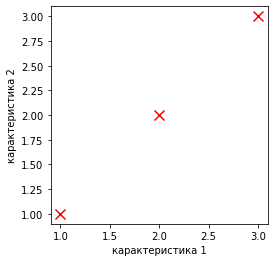

In [46]:
plt.scatter([1, 2, 3], [1, 2, 3], c='r', marker='x', s= 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('карактеристика 1')
plt.ylabel('карактеристика 2')

In [13]:
print("Коваријансна матрица:\n", np.cov([1, 2, 3], [1, 2, 3]))

Коваријансна матрица на проблемот
 [[1. 1.]
 [1. 1.]]


Елементите по дијагоналата ги претставувааат варијансите на индивидуалните карактеристики, а спротивната дијагонала ги претставуваат коваријансите помеѓу истите.

### Конваријансна матрица на растечко линеарно зависни карактеристики

Text(0, 0.5, 'карактеристика 2')

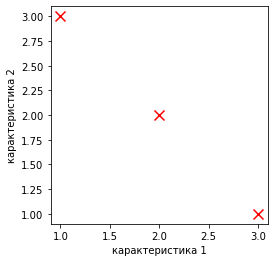

In [47]:
plt.scatter([1, 2, 3], [3, 2, 1], c='r', marker='x', s= 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('карактеристика 1')
plt.ylabel('карактеристика 2')

In [17]:
print("Коваријансна матрица:\n", np.cov([1, 2, 3], [3, 2, 1]))

Коваријансна матрица:
 [[ 1. -1.]
 [-1.  1.]]


Елементите по дијагоналата ги претставувааат варијансите на индивидуалните карактеристики, а спротивната дијагонала ги претставуваат коваријансите помеѓу истите.

### Коваријансна матрица на карактеристики кои немаат ниту растечка ниту опаѓачка зависност

Text(0, 0.5, 'карактеристика 2')

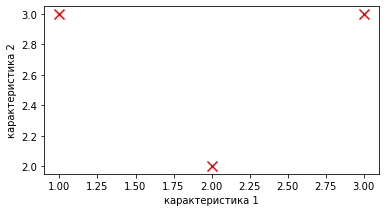

In [48]:
plt.scatter([1, 2, 3], [3, 2, 3], c='r', marker='x', s= 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('карактеристика 1')
plt.ylabel('карактеристика 2')

In [20]:
print("Коваријансна матрица:\n", np.cov([1, 2, 3], [3, 2, 3]))

Коваријансна матрица:
 [[1.         0.        ]
 [0.         0.33333333]]


Елементите по дијагоналата ги претставувааат варијансите на индивидуалните карактеристики, а спротивната дијагонала ги претставуваат коваријансите помеѓу истите.

### Сопствени вектори на коваријансна матрица

In [24]:
u, sigma, v = np.linalg.svd(np.cov([1, 2, 3], [1, 2, 3]))

#### Сопствени вектори на коваријансна матрица на две растечко линеарно зависни карактеристики

Text(0, 0.5, 'карактеристика 2')

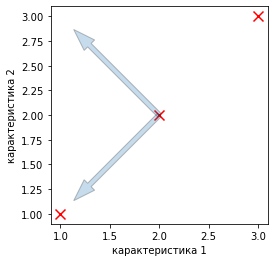

In [49]:
plt.arrow(0 + 2, 0 + 2, u[0, 0], u[0, 1], width=0.05, alpha=0.25)
plt.arrow(0 + 2, 0 + 2, u[1, 0], u[1, 1], width=0.05, alpha=0.25)
plt.scatter([1, 2, 3], [1, 2, 3], c='r', marker='x', s= 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('карактеристика 1')
plt.ylabel('карактеристика 2')

#### Сопствени вектори на коваријансна матрица на две опаѓачко линеарно зависни карактеристики

In [341]:
u, sigma, v = np.linalg.svd(np.cov([1, 2, 3], [3, 2, 1]))

Text(0, 0.5, 'карактеристика 2')

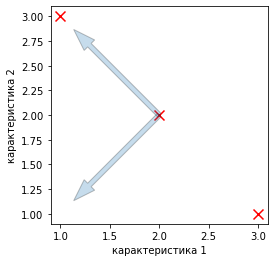

In [50]:
plt.arrow(0 + 2, 0 + 2, u[0, 0], u[0, 1], width=0.05, alpha=0.25)
plt.arrow(0 + 2, 0 + 2, u[1, 0], u[1, 1], width=0.05, alpha=0.25)
plt.scatter([1, 2, 3], [3, 2, 1], c='r', marker='x', s= 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('карактеристика 1')
plt.ylabel('карактеристика 2')

In [343]:
u, sigma, v = np.linalg.svd(np.cov([1, 2, 3], [3, 2, 3]))

#### Сопствени вектори на коваријансна матрица на карактеристики кои немаат ниту растечка ниту опаѓачка зависност

Text(0, 0.5, 'карактеристика 2')

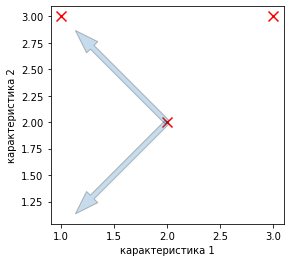

In [51]:
plt.arrow(0 + 2, 0 + 2, u[0, 0], u[0, 1], width=0.05, alpha=0.25)
plt.arrow(0 + 2, 0 + 2, u[1, 0], u[1, 1], width=0.05, alpha=0.25)
plt.scatter([1, 2, 3], [3, 2, 3], c='r', marker='x', s= 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('карактеристика 1')
plt.ylabel('карактеристика 2')

# Dimensionality Curse - проклетство на висока димензија на податочното множество

Со зголемување на бројот на димензии се зголемува и растојанието помеѓу секоја од податочните точки. Колку повеќе се зголемува бројот на димензии толку растојанијата помеѓу секој пар од точките тежнее кон приближна иста вредност. Ова е погубно за алгоритмите кои функционираат брз база на растојание како KNN, KMeans, DBScan итн.

**Ќе илустрираме пример каде што ќе покажеме дека распределбата на растојанијата помеѓу секој пар точки тежнее да и се намалува варијансата и зголемува просечната вредност со зголемување на бројот на димензии. Ова го потврдува фактот дека бројот на димензии го проретчува просторот во кој се простира секоја податочна точка.**

In [64]:
x1_c1 = np.random.normal(0, 1, 100)
x2_c1 = np.random.normal(0, 1, 100)

x1_c2 = np.random.normal(0, 1, 100)
x2_c2 = np.random.normal(0, 1, 100)
X = np.vstack((np.append(x1_c1, x1_c2), np.append(x2_c1, x2_c2))).T

Text(0, 0.5, 'карактеристика 2')

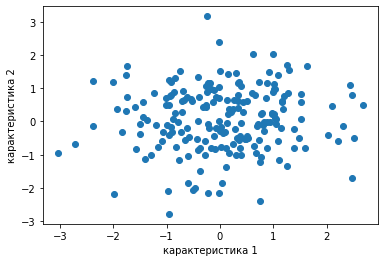

In [65]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('карактеристика 1')
plt.ylabel('карактеристика 2')

Text(0.5, 1.0, 'Распределба на растојанијата помеѓу секој пар точки')

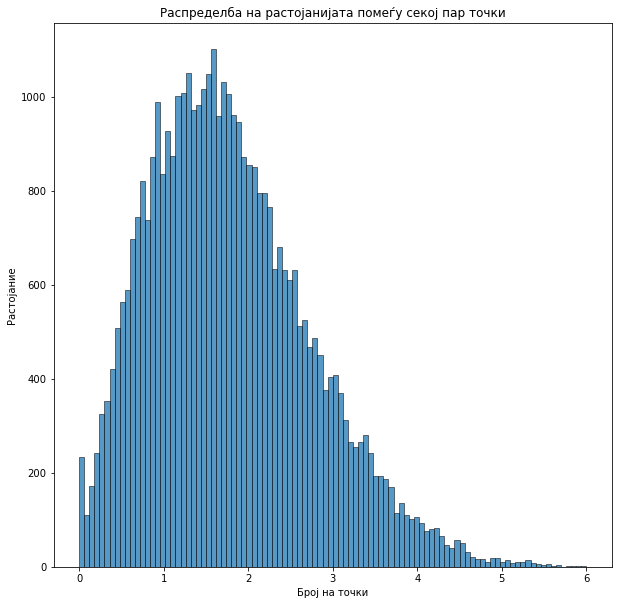

In [66]:
plt.figure(figsize=(10, 10))
sns.histplot(spatial.distance.cdist(X, X).flatten(), bins=100)
plt.xlabel('Број на точки')
plt.ylabel('Растојание')
plt.title('Распределба на растојанијата помеѓу секој пар точки')

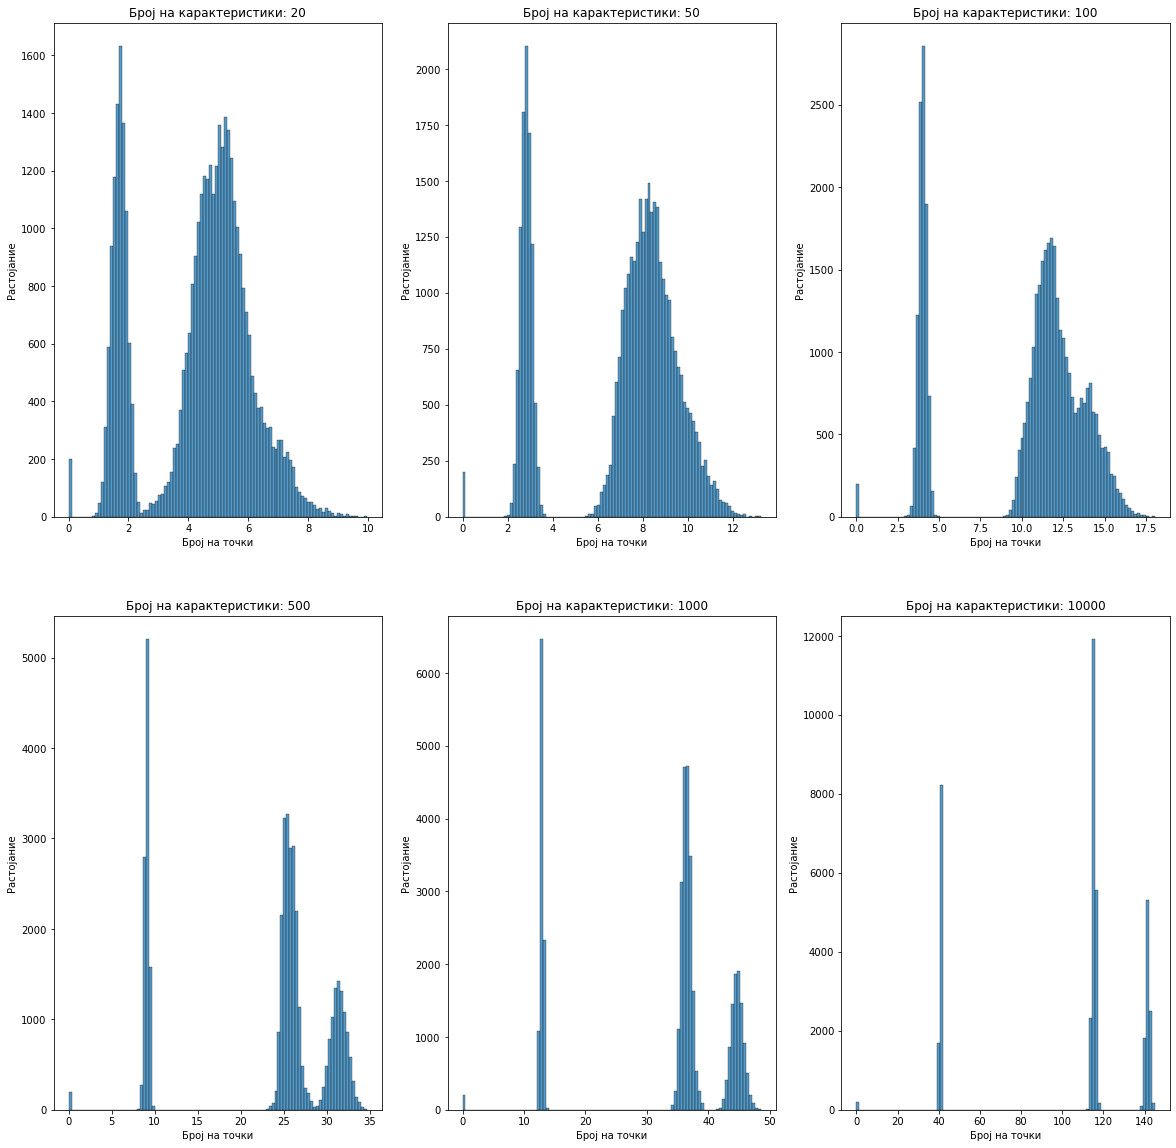

In [67]:
dimensions = [20, 50, 100, 500, 1000, 10000]
plt.figure(figsize=(20, 20))

for nr, dimension in enumerate(dimensions):
    X = np.empty((200, 0))
    for i in range(1, (dimension + 1)//2):
        x1_c1 = np.random.normal(0, 1, 100)
        x2_c1 = np.random.normal(0, 1, 100)

        x1_c2 = np.random.uniform(0, 1, 100)
        x2_c2 = np.random.uniform(0, 1, 100)
        X = np.hstack((X, np.vstack((np.append(x1_c1, x1_c2), np.append(x2_c1, x2_c2))).T))
    
    plt.subplot(2, 3, nr + 1)
    sns.histplot(spatial.distance.cdist(X, X).flatten(), bins=100)
    plt.title(f"Број на карактеристики: {dimension}")
    plt.xlabel('Број на точки')
    plt.ylabel('Растојание')

### Илустрација на просечното, минималното и соодносот од минималното и просечното растојание со зголемување на бројот на димензии

In [68]:
dimensions = [20, 50, 100, 500, 1000, 10000, 20000, 50000]
avg = []
mmin = []
ratio = []
for nr, dimension in enumerate(dimensions):
    X = np.empty((200, 0))
    for i in range(1, (dimension + 1)//2):
        x1_c1 = np.random.normal(0, 1, 100)
        x2_c1 = np.random.normal(0, 1, 100)

        x1_c2 = np.random.normal(0, 1, 100)
        x2_c2 = np.random.normal(0, 1, 100)
        X = np.hstack((X, np.vstack((np.append(x1_c1, x1_c2), np.append(x2_c1, x2_c2))).T))
    pom = spatial.distance.cdist(X, X).flatten()
    avg.append(pom.mean())
    mmin.append(pom[pom != 0].min())
    ratio.append(mmin[len(mmin) - 1]/avg[len(avg) - 1])

Text(0, 0.5, 'Просечно растојание од сите парови од точки')

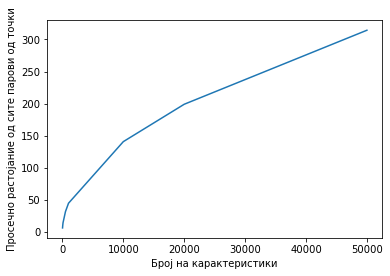

In [70]:
plt.plot(dimensions, avg)
plt.xlabel('Број на карактеристики')
plt.ylabel('Просечно растојание од сите парови од точки')

Text(0, 0.5, 'Минимално растојание од сите парови од точки')

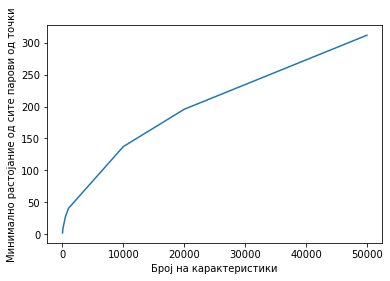

In [71]:
plt.plot(dimensions, mmin)
plt.xlabel('Број на карактеристики')
plt.ylabel('Минимално растојание од сите парови од точки')

Text(0, 0.5, 'Сооднос на минимално/Просечно растојание од сите парови од точки')

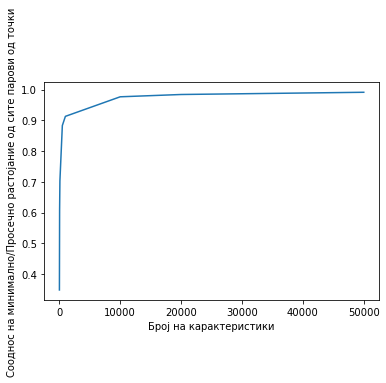

In [72]:
plt.plot(dimensions, ratio)
plt.xlabel('Број на карактеристики')
plt.ylabel('Сооднос на минимално/Просечно растојание од сите парови од точки')

**Соодносот на минималното и просечното растојание тежнее кон 1 со зголемување на бројот на карактеристики. Тоа значи дека точките тежнеат да се оддаелечуваат кога бројот на карактеристики се зголемува, а дополнитело растојанието помеѓу секој пар од точки тежнее да стане исто.**

## Премногу карактеристики во однос на бројот на точки може да доведе и до overfitting.
Со зголемување на бројот на карактеристики се обезвреднува множеството за тренирање. Конкретно,л колку повеќе карактеристики додаваме толку повеќе го проретчуваме множеството за тренирање, односно се повеќе се зголемува веројатноста новите точки на предвидување(пр. test или CV) да бидат нешто што моделот не можело да го види или екстраполира при тренирање.

Text(0.5, 0, 'Карактеристика 1')

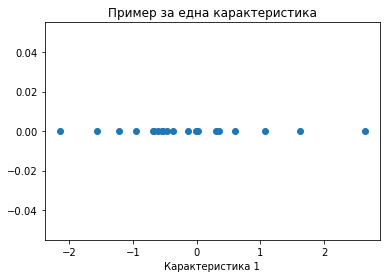

In [92]:
x1 = np.random.normal(0, 1, 20)
plt.scatter(x1, np.zeros(x1.shape))
plt.title('Пример за една карактеристика')
plt.xlabel('Карактеристика 1')

Text(0, 0.5, 'Карактеристика 2')

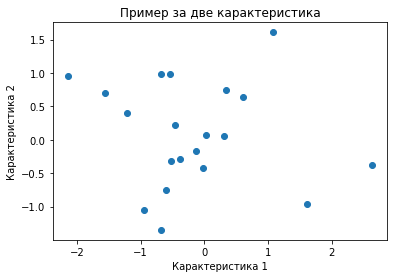

In [93]:
x2 = np.random.normal(0, 1, 20)
plt.scatter(x1, x2)
plt.title('Пример за две карактеристика')
plt.xlabel('Карактеристика 1')
plt.ylabel('Карактеристика 2')

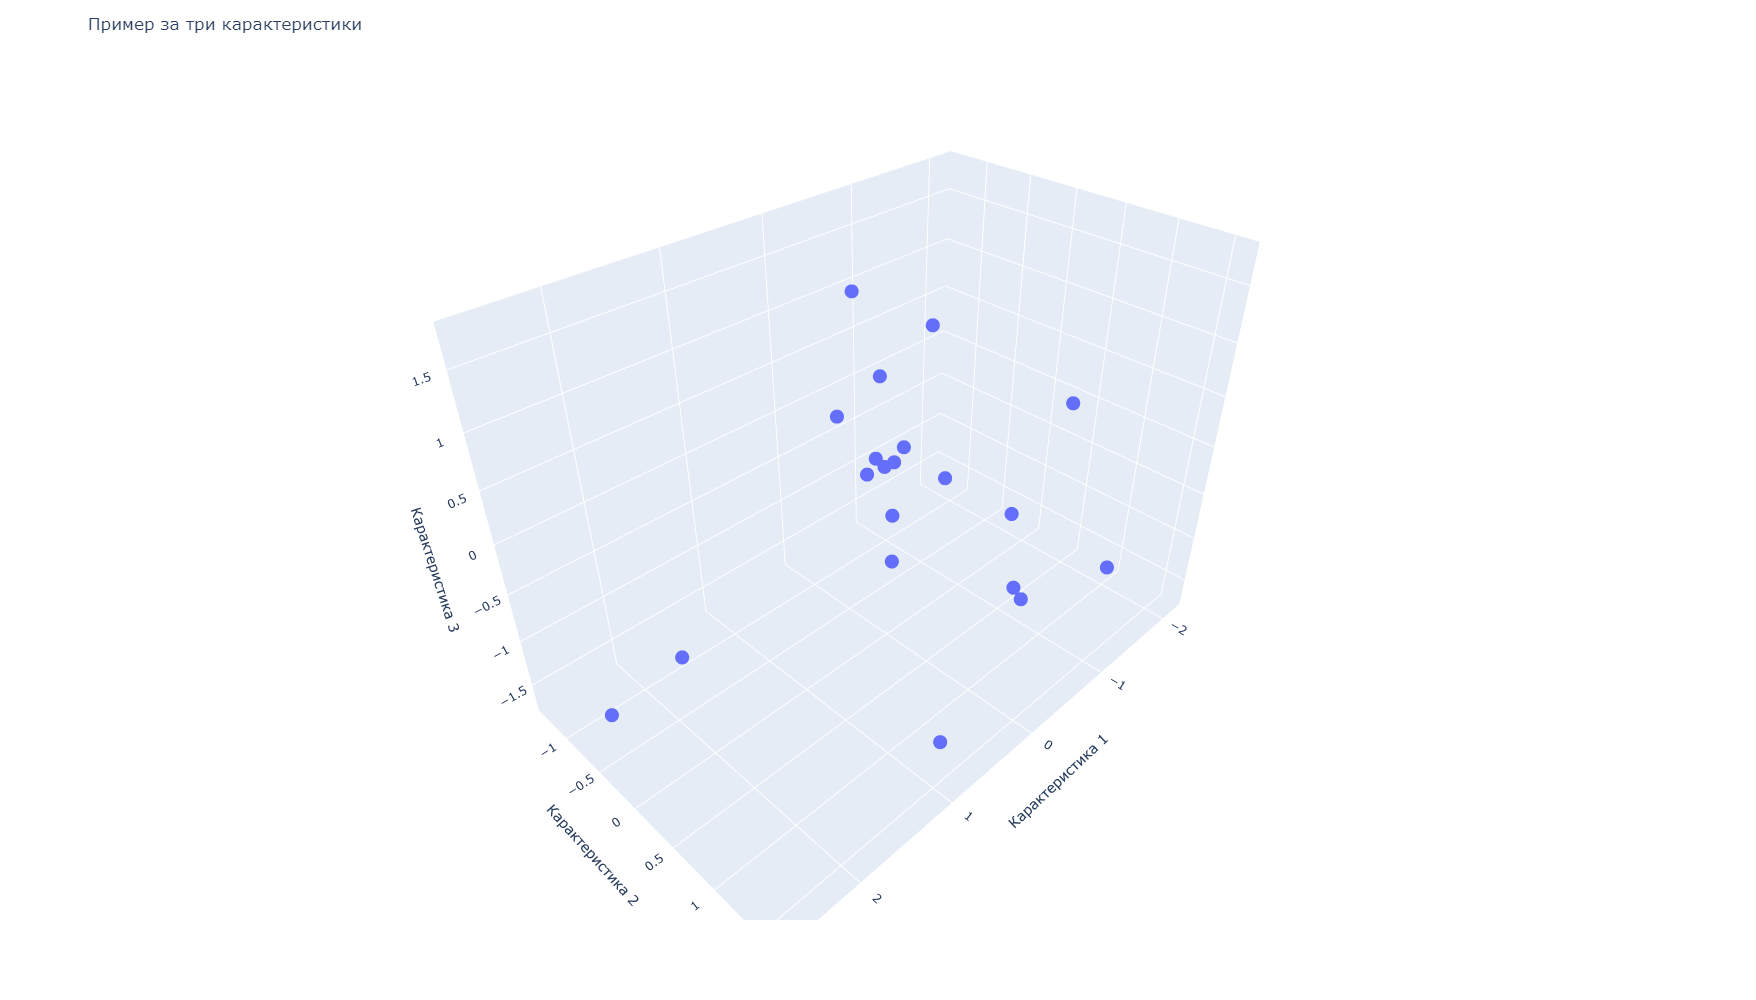

In [94]:
x3 = np.random.normal(0, 1, 20)
fig = px.scatter_3d(x=x1, y=x2, z=x3, labels={'x': 'Карактеристика 1', 'y': 'Карактеристика 2', 'z': 'Карактеристика 3'})
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    title_text='Пример за три карактеристики'
)
fig.show()

Со зголемување на бројот на карактеристики, податочното множество се проретчува и се повеќе се зголемува бројот на комбинации од вредности за секоја карактеристика коишто алгоритмот не ги видел при тренирање.

#  Да претпоставиме дека имам епроблем на класификација каде што карактеристики можеме да избереме променливи кое припаѓаат на моножеството {0, 1}

Во овој случај ќе претпоставиме дека за секоја комбинација од вредности за карактеристиките ќе ни требаат минимум 10 податочни точки за да можеме да го истренираме моделот да предвидува задоволително. Според тоа, трендот на потребниот број на податоци според бројот на карактеристики ќе биде следниот:
1. Една карактеристика -> две комбинации од вредности {0, 1} -> 2*10 = 20 потребни податочни точки
2. Две карактеристики -> четири комбинации од вредности {00, 01, 10, 11} -> 4*10 = 40 потребни податочни точки

    .

    .

    .

3. n Карактеристики -> $2^n$ комбинации од вредности -> $2^n*10$ потребни податочни точки

**Според овам бројот на потребни податоци за тренирање се зголемува експоненцијално со зголемување на бројот на карактеристики**

Text(0, 0.5, 'Потребен број на податоци за тренирање')

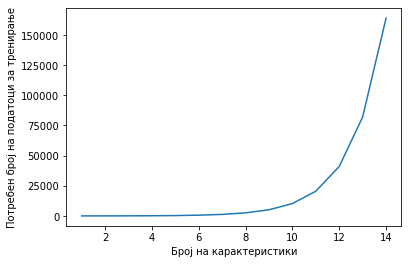

In [109]:
feature_number = np.arange(1, 15, 1)
plt.plot(feature_number, np.power(2*np.ones(feature_number.shape), feature_number)*10)
plt.xlabel('Број на карактеристики')
plt.ylabel('Потребен број на податоци за тренирање')

# Примена на PCA со помош на sklearn
Ќе примениме PCA на примерот за цена на куќи од погоре.

In [121]:
from sklearn.decomposition import PCA

In [122]:
x1 = np.random.normal(60, 30, 1000) # плоштина на куќа во m^2
x2 = 10.76*x1 + np.random.normal(0, 50, 1000) # плоштина на куќа во ft^2 + шум 
y = 1000*x1 # цена на куќа во евра

In [123]:
X = np.vstack((x1, x2)).T

In [124]:
pca = PCA(n_components=1) # примена на PCA според фиксиран број на карактеристики
X = pca.fit_transform(X)

Text(0.5, 0, 'Имплицитна карактеристика добиена од x1 И x2')

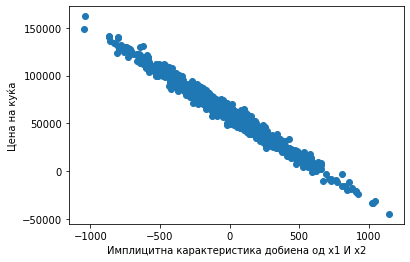

In [126]:
plt.scatter(X, y)
plt.ylabel('Цена на куќа')
plt.xlabel('Имплицитна карактеристика добиена од x1 И x2')

PCA може да се примени и со параметар за задржување на варијасната на податоците

In [128]:
pca = PCA(n_components=0.99) # примена на PCA со зачувување на 99% од варијансата на податоците
X = pca.fit_transform(X)

Text(0.5, 0, 'Имплицитна карактеристика добиена од x1 И x2')

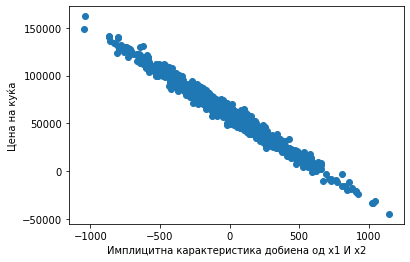

In [129]:
plt.scatter(X, y)
plt.ylabel('Цена на куќа')
plt.xlabel('Имплицитна карактеристика добиена од x1 И x2')

При примена на PCA битно е да се применува алгоритмот соодветно на множеството за тренирање и множествоото за тестирање/CV. Правилото за примена е исто како и кај нормализација на податоците. Fit се применува на множеството за тренирање, а transform се применува на множеството за тестирање/валидација. Доколку се примени fit  на множеството за тестирање/CV се ризикува да се направи overfitting поради протек на информација од множеството за тестирање/CV во множеството за тренирање.